In [1]:
#202331106_Istydaniahusen
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

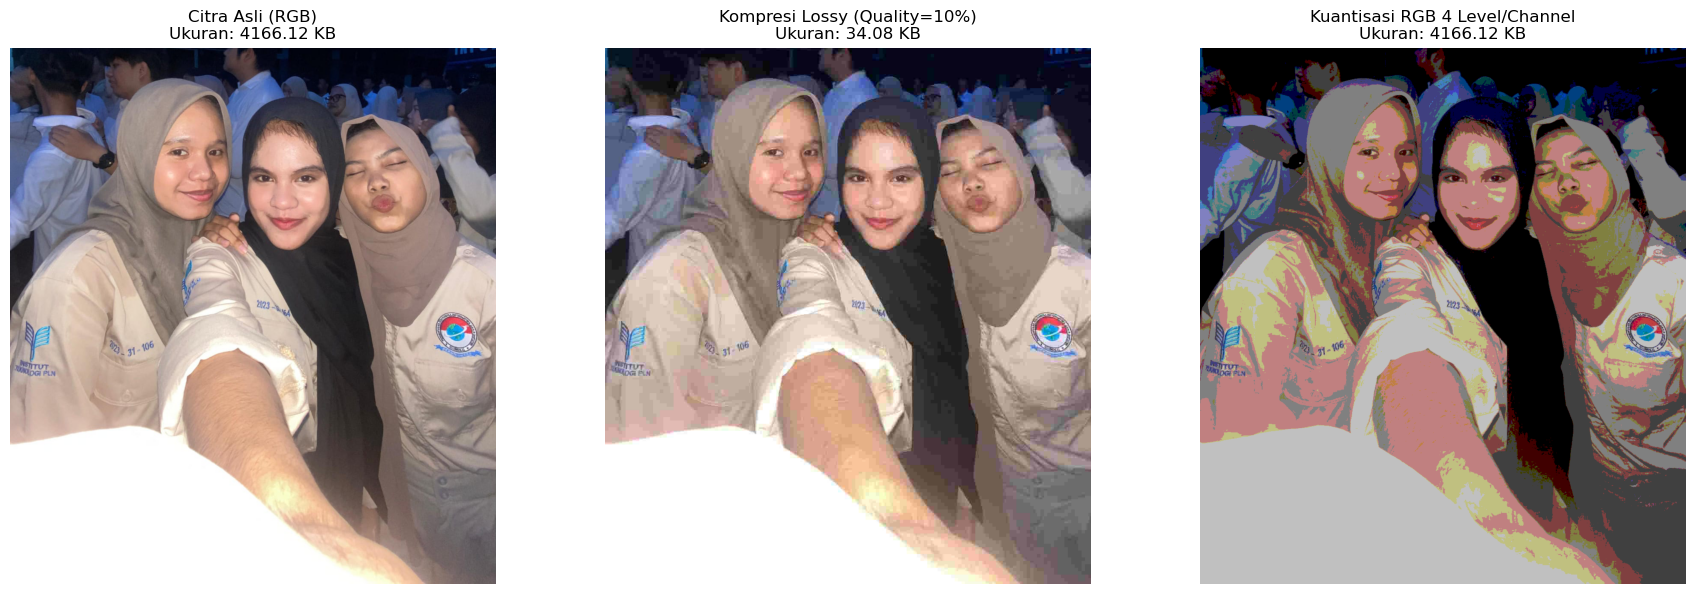

In [2]:
#202331106_Istydaniahusen
original_image = cv2.imread('inforgirl.jpg')
original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

cv2.imwrite('inforgirl.jpg', original_image, [cv2.IMWRITE_JPEG_QUALITY, 10])
compressed_image = cv2.imread('inforgirl.jpg')
compressed_rgb = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)

def quantize_rgb(img, levels=4):
    step = 256 // levels
    quantized = np.floor(img / step) * step
    return quantized.astype(np.uint8)

quantized_rgb = quantize_rgb(original_rgb)

def get_mem_size(img):
    return img.nbytes / 1024 

def get_file_size(path):
    return os.path.getsize(path) / 1024 

size_original = get_mem_size(original_rgb)
size_compressed = get_file_size('inforgirl.jpg')
size_quantized = get_mem_size(quantized_rgb)

titles = [
    f'Citra Asli (RGB)\nUkuran: {size_original:.2f} KB',
    f'Kompresi Lossy (Quality=10%)\nUkuran: {size_compressed:.2f} KB',
    f'Kuantisasi RGB 4 Level/Channel\nUkuran: {size_quantized:.2f} KB'
]
images = [original_rgb, compressed_rgb, quantized_rgb]

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()